# 2) Use CC_GENERAL.csv given in the folder and apply:
a) Preprocess the data by removing the categorical column and filling the missing values.
b) Apply StandardScaler() and normalize() functions to scale and normalize raw input data.
c) Use PCA with K=2 to reduce the input dimensions to two features.
d) Apply Agglomerative Clustering with k=2,3,4 and 5 on reduced features and visualize
result for each k value using scatter plot.
e) Evaluate different variations using Silhouette Scores and Visualize results with a bar chart.

In [43]:
#importing all libraries here for assignment
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [44]:
df = pd.read_csv('CC GENERAL.csv')


In [45]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [46]:
del df['CUST_ID']

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [47]:
df.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [48]:
mean1=df['CREDIT_LIMIT'].mean()
mean2=df['MINIMUM_PAYMENTS'].mean()
df['CREDIT_LIMIT'].fillna(value=mean1, inplace=True)
df['MINIMUM_PAYMENTS'].fillna(value=mean2, inplace=True)

In [49]:
df.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [50]:
# This plots the correlation matrix using the color gradient "YLOrRd"
df.corr().style.background_gradient(cmap="YlOrRd")

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


In [51]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled_df = pd.DataFrame(X_scaled_array, columns = x.columns)

In [52]:
#Normalization is the process of scaling individual samples to have unit norm. 
#This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.
X_normalized = preprocessing.normalize(X_scaled_df)
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [53]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_normalized)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['TENURE']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,TENURE
0,-0.488186,-0.677233,12
1,-0.517294,0.556075,12
2,0.334384,0.287313,12
3,-0.486617,-0.080780,12
4,-0.562175,-0.474770,12


Text(0, 0.5, 'principal component 2')

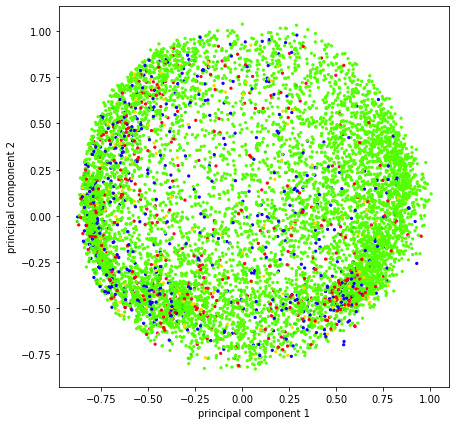

In [57]:
plt.figure(figsize=(7,7))
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],c=finalDf['TENURE'],cmap='prism', s =5)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

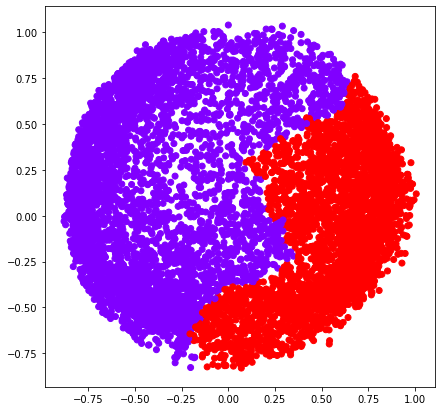

In [58]:
ac2 = AgglomerativeClustering(n_clusters = 2)
 
# Visualizing the clustering
plt.figure(figsize =(7, 7))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
           c = ac2.fit_predict(principalDf), cmap ='rainbow')
plt.show()

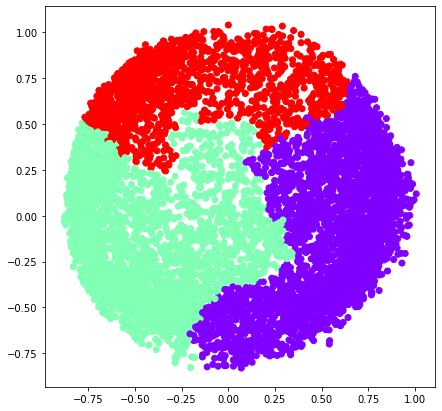

In [59]:
ac3 = AgglomerativeClustering(n_clusters = 3)
 
# Visualizing the clustering
plt.figure(figsize =(7, 7))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
           c = ac3.fit_predict(principalDf), cmap ='rainbow')
plt.show()

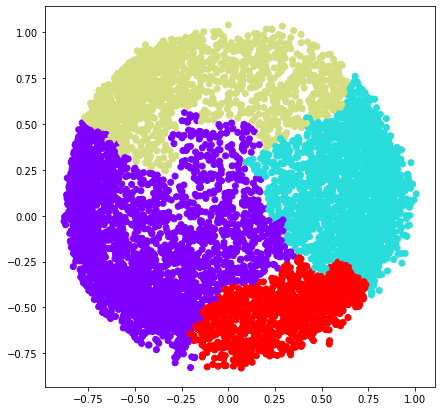

In [60]:
ac4 = AgglomerativeClustering(n_clusters = 4)
 
# Visualizing the clustering
plt.figure(figsize =(7, 7))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
           c = ac4.fit_predict(principalDf), cmap ='rainbow')
plt.show()

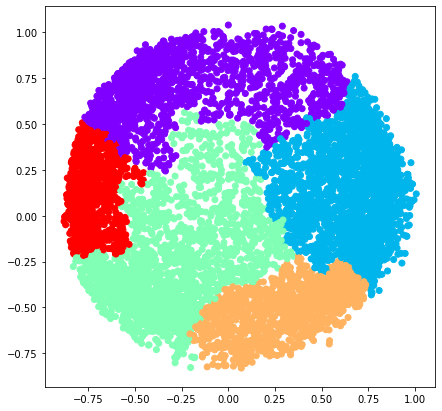

In [62]:
ac5 = AgglomerativeClustering(n_clusters = 5)
 
# Visualizing the clustering
plt.figure(figsize =(7, 7))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],
           c = ac5.fit_predict(principalDf), cmap ='rainbow')
plt.show()

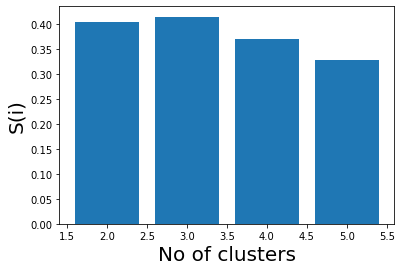

In [64]:
k = [2, 3, 4, 5]
 
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(principalDf, ac2.fit_predict(principalDf)))
silhouette_scores.append(
        silhouette_score(principalDf, ac3.fit_predict(principalDf)))
silhouette_scores.append(
        silhouette_score(principalDf, ac4.fit_predict(principalDf)))
silhouette_scores.append(
        silhouette_score(principalDf, ac5.fit_predict(principalDf)))

 
# Plotting a bar graph to compare the results
plt.bar([2, 3, 4, 5], silhouette_scores)
plt.xlabel('No of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()